# Analysis On Breast Cancer Survival

### Table of Contents

- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#sectin101)</br>
    - 1.2 [Data source and data set](#section102)</br>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [shape](#section301)<br/>
    - 3.2 [columns](#section302)<br/>
    - 3.3 [head](#section303)<br/>
    - 3.4 [tail](#section304)<br/>
    - 3.5 [info](#section305)</br>
    - 3.6 [describe](#sectin306)</br>
    - 3.7 [isnull](#section307)</br>
    - 3.8 [Pre Profiling](#section308)</br>
    - 3.9 [Intial Observation](#section309)</br>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Replacing 0 values](#section401)<br/>
    - 4.2 [Removing Duplicates](#section402)<br/>
    - 4.3 [Post Profiling](#section402)<br/>
    - 4.4 [Final Observation](#section403)</br>
- 5. [Analysis through questions](#section5)</br>
    - 5.1 [Operations per Year](#section501)</br>
    - 5.2 [What is the survival status after operation](#section502)</br>
        - 5.2.1 [Using Countplot](#section503)</br>
        - 5.2.2 [Using Groupby](#section504)</br>
    - 5.3 [Which age group is most and least affected by breast cancer](#section505)</br>
    - 5.4 [How is Age related to the survival status](#section506)</br>
    - 5.5 [Relationship between Age group and Post auxillary nodes](#section507)</br>
- 6. [Conclusion](#section6)</br>
    

<a id=section1></a> 
## 1.Problem Statement 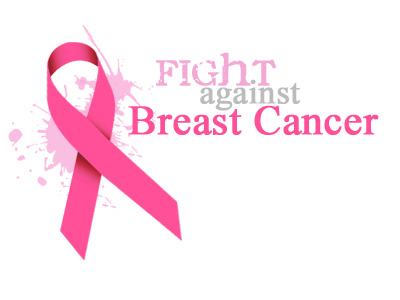
The dataset contains cases from a study that was conducted on the __Survival status of Breast Cancer__ from the year 1958 to 1970.

<a id=section101></a> 
### 1.1. Introduction

Cancer is a disease in which cells in the body grow out of control. Except for skin cancer, breast cancer is the most common cancer in women in the United States. Deaths from breast cancer have declined over time, but remains the second leading cause of cancer death among women overall and the leading cause of cancer death among Hispanic women.

Breast cancer occurs as normal cells in tissue start to grow and divide in an out of control manner. As they grow, the cells often, but not always, form a tumor in the breast that can be detected in a mammogram before it can be felt as a lump or thickening.

<a id=section102></a> 
### 1.2. Data source and dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer

- __Name of Hospital__: "University of Chicago's Billings Hospital"
- __Year__: 1958  to 1970

#### Column Description

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
    - 1 = the patient survived 5 years or longer 
    - 2 = the patient died within 5 year
    


<a id=section2></a> 
### 2. Load the packages and data 

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

from subprocess import check_output


In [3]:
bc_survival = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv")

<a id=section3></a> 
### 3. Data Profiling

- Review the data types and sample data to understand what variables we are dealing with?<br>
- Which variables need to be transformed in some way before they can be analyzed?
- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.

<a id  = section301></a>

In [5]:
bc_survival.shape               # Display the first five rows of the data set

(306, 4)

Breast cancer survival dataset  has 306 rows and 4 columns.

<a id = section302></a>

In [6]:
bc_survival.columns


Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')

<a id = section303></a>

In [10]:
bc_survival.head()                       # Display the first five rows of the data set

,Age,Years_of_operation,Pos_axillary_nodes,Status,age_Group
0,30,64,1,1,<35
1,30,62,3,1,<35
2,30,65,0,1,<35
3,31,59,2,1,<35
4,31,65,4,1,<35


<a id = section304></a>

In [11]:
bc_survival.tail()

,Age,Years_of_operation,Pos_axillary_nodes,Status,age_Group
301,75,62,1,1,66+
302,76,67,0,1,66+
303,77,65,3,1,66+
304,78,65,1,2,66+
305,83,58,2,2,66+


<a id = section305></a>

In [11]:
bc_survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


<a id = section306></a>

In [12]:
bc_survival.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<a id = section307></a>

In [13]:
bc_survival.isnull().sum()

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
age_Group             0
dtype: int64

<a id=section308></a>
### 3.8 Pre Profiling

In [14]:
profile = pandas_profiling.ProfileReport(bc_survival)
profile.to_file(outputfile="bc_survival_before_preprocessing.html")

<a id = section309></a>
### 3.9 Intial Observation

- Summary of datatypes in dataset
    - Number of variables	    4
    - Number of observations	306
- There are no missing values
- The datatypeswhich need to be addressed in the next section
    - There are 136 zeros in the Pos_axillary_nodes column
    - There are 17 duplicate rows in the data set

<a id=section4></a> 
### 4. Data Normalization

<a id = section401></a>
#### 4.1  Replacing 0 values

In [15]:
bc_survival['Pos_axillary_nodes']=bc_survival['Pos_axillary_nodes'].replace(0,bc_survival['Pos_axillary_nodes'].median())

<a id = section402></a>
#### 4.2  Removing Duplicates

In [16]:
bc_survival.drop_duplicates(keep=False,inplace=True) 

<a id = section403></a>
#### 4.3 Post Profiling

In [17]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(bc_survival)
profile.to_file(outputfile="bc_survival_after_preprocessing.html")

<a id = section404></a>
#### 4.4 Final Observation

- After the post processing step we conclude that
    - There are no missing values
    - There are no duplicate rows in the dataset.

<a  id = section5></a>
## 5. Analysis through Questions

<a id = section501></a>
### 5.1 Operations per Year

Text(0.5, 1.0, 'Operations per year')

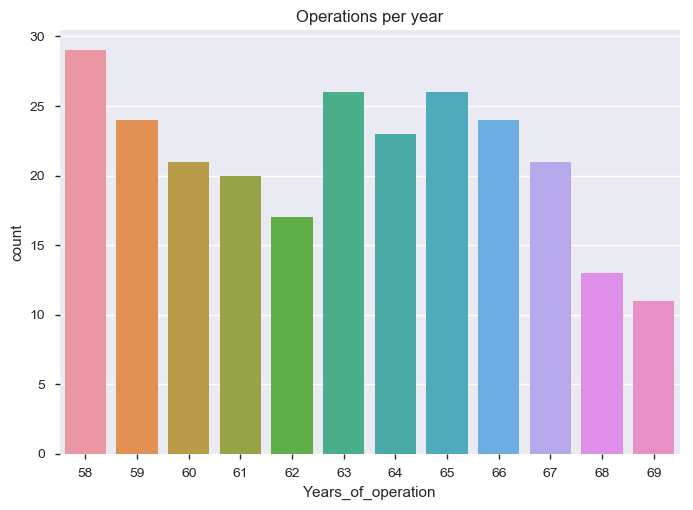

In [18]:
sns.countplot(x='Years_of_operation', data=bc_survival).set_title('Operations per year')

<a id = section502></a>
### 5.2 What is the survival status after operation

<a id = section503></a>
#### 5.2.1 Using Countplot

Text(0.5, 1.0, 'Count plot for Survival status')

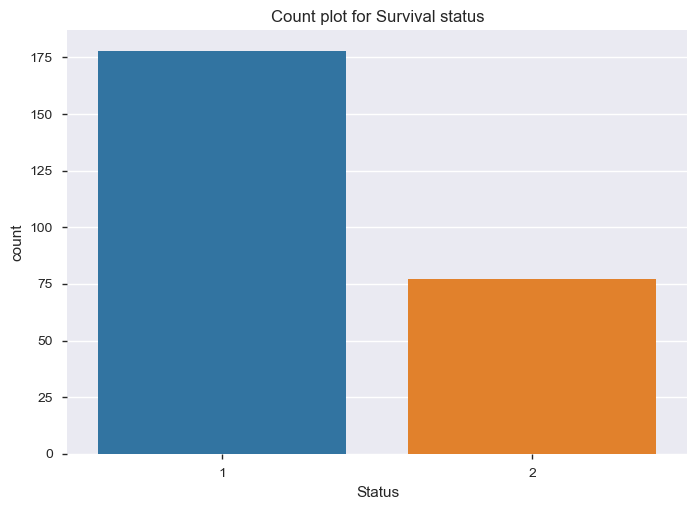

In [19]:
sns.countplot(x='Status', data=bc_survival).set_title('Count plot for Survival status')

<a id = section504></a>
#### 5.2.2 Using Groupby

In [20]:
bc_survival.groupby(['Status'])['Status'].count()

Status
1    178
2     77
Name: Status, dtype: int64

- We can observe that the status 1 has more count.
- The survival rate is more than 5 years for  most of them after surgery.


<a id = section505></a>
### 5.3 Which age group is most and least affected by Breast Cancer

- Converting Age to Age group

In [21]:
bc_survival['age_Group'] = pd.cut(bc_survival['Age'].dropna(),
                         [30,36,46,56,66,85],
                         labels=['<35','35-45','45-55','55-66','66+'], include_lowest=True)

Text(0.5, 1.0, 'Count plot for age_Group')

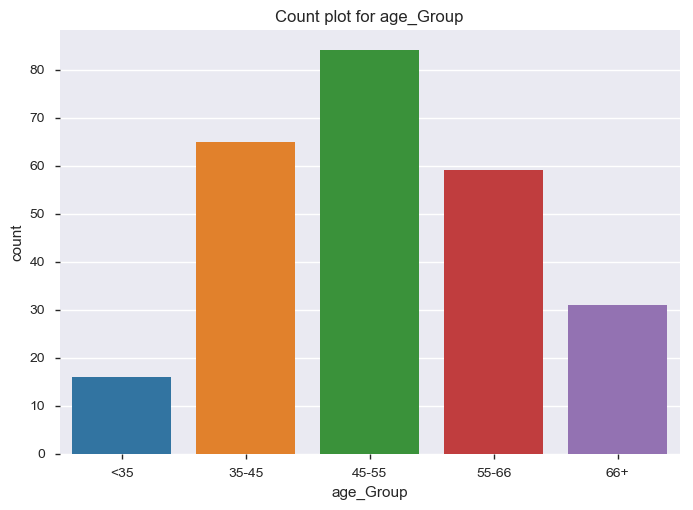

In [22]:
sns.countplot(x='age_Group', data=bc_survival).set_title('Count plot for age_Group')

- From the above plot, we can observe that 
    - The most affected age group to breast cancer is 45-55
    - The least affected age group is less than 35.

<a id = section506></a>
### 5.4 How is Age related to the survival status

  Using Countplot

Text(0.5, 1.0, 'Age Group vs Status')

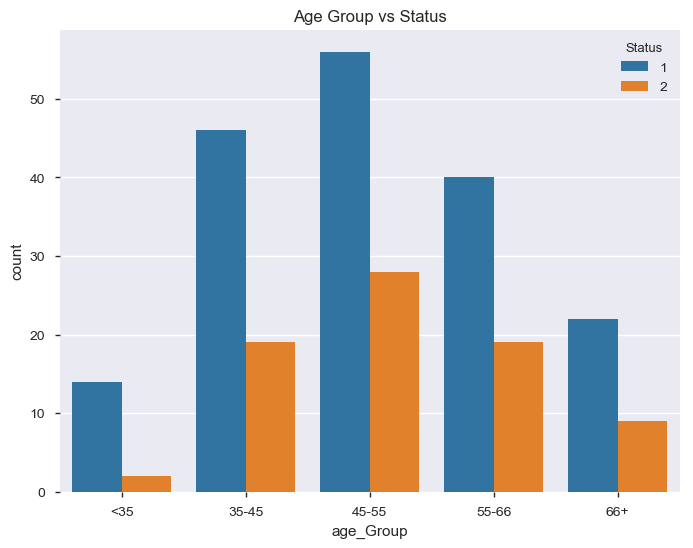

In [21]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = bc_survival,x = 'age_Group', hue='Status')
plt.title('Age Group vs Status')

- From the above graph, we can observe that 
    - In all the age groups, the maximum survival rate(more than 5 years) is very high
    - Very few people survived for less than 5 years after the operation.

<a id = section507></a>
### 5.5 Relationship between Age group and Post auxillary nodes

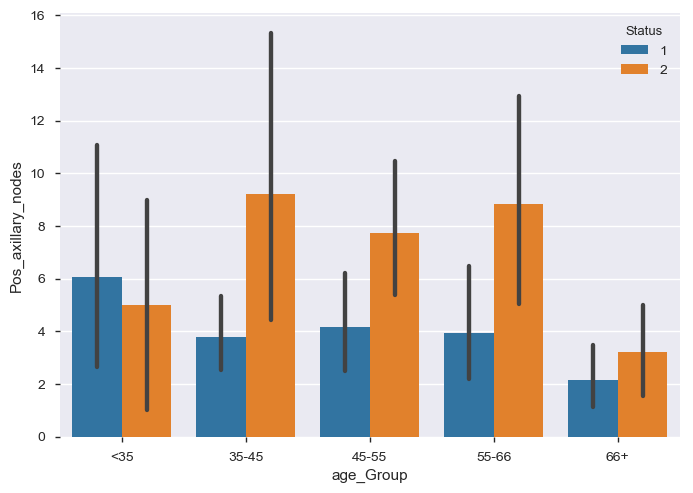

In [22]:
sns.barplot(x = "age_Group", y = "Pos_axillary_nodes", hue = "Status", data = bc_survival)
plt.show()

- From the above plot,we can observe that
    - In most of the age group with survival status 2 (less than 5 years) have high no. of Pos_axillary nodes
    - The age group with survival status 2 (5 or more than that) have less no.of Pos_axillary nodes.

- We can also observe that if the pos-axillary nodes are higher in the body the the survival status of any person may be affected or drop down.

<a id = section6></a>
## 6. Conclusion

- The case study conducted on patients who had undrgone surgery for breast cancer reveals that 
    - The survival status depends upon the no.of positive axillary nodes, higher the no.of positive axilarry nodes, lesser is         the survival of the patientt and vice-versa.
    - The survival status of  patients is maximum after surgery, there are only a few  cases where the survival of the patient        is less than 5 years.
    - Atlast we can conclude that the maximum patients who have undergone the surgery fall under the age-group 45-55.
